In [1]:
import matplotlib.pyplot as plt

In [2]:
# Matplotlib essentials

In [3]:
# Figures and subplots

In [4]:
fig = plt.figure(figsize=(12, 6), dpi=200)

<Figure size 2400x1200 with 0 Axes>

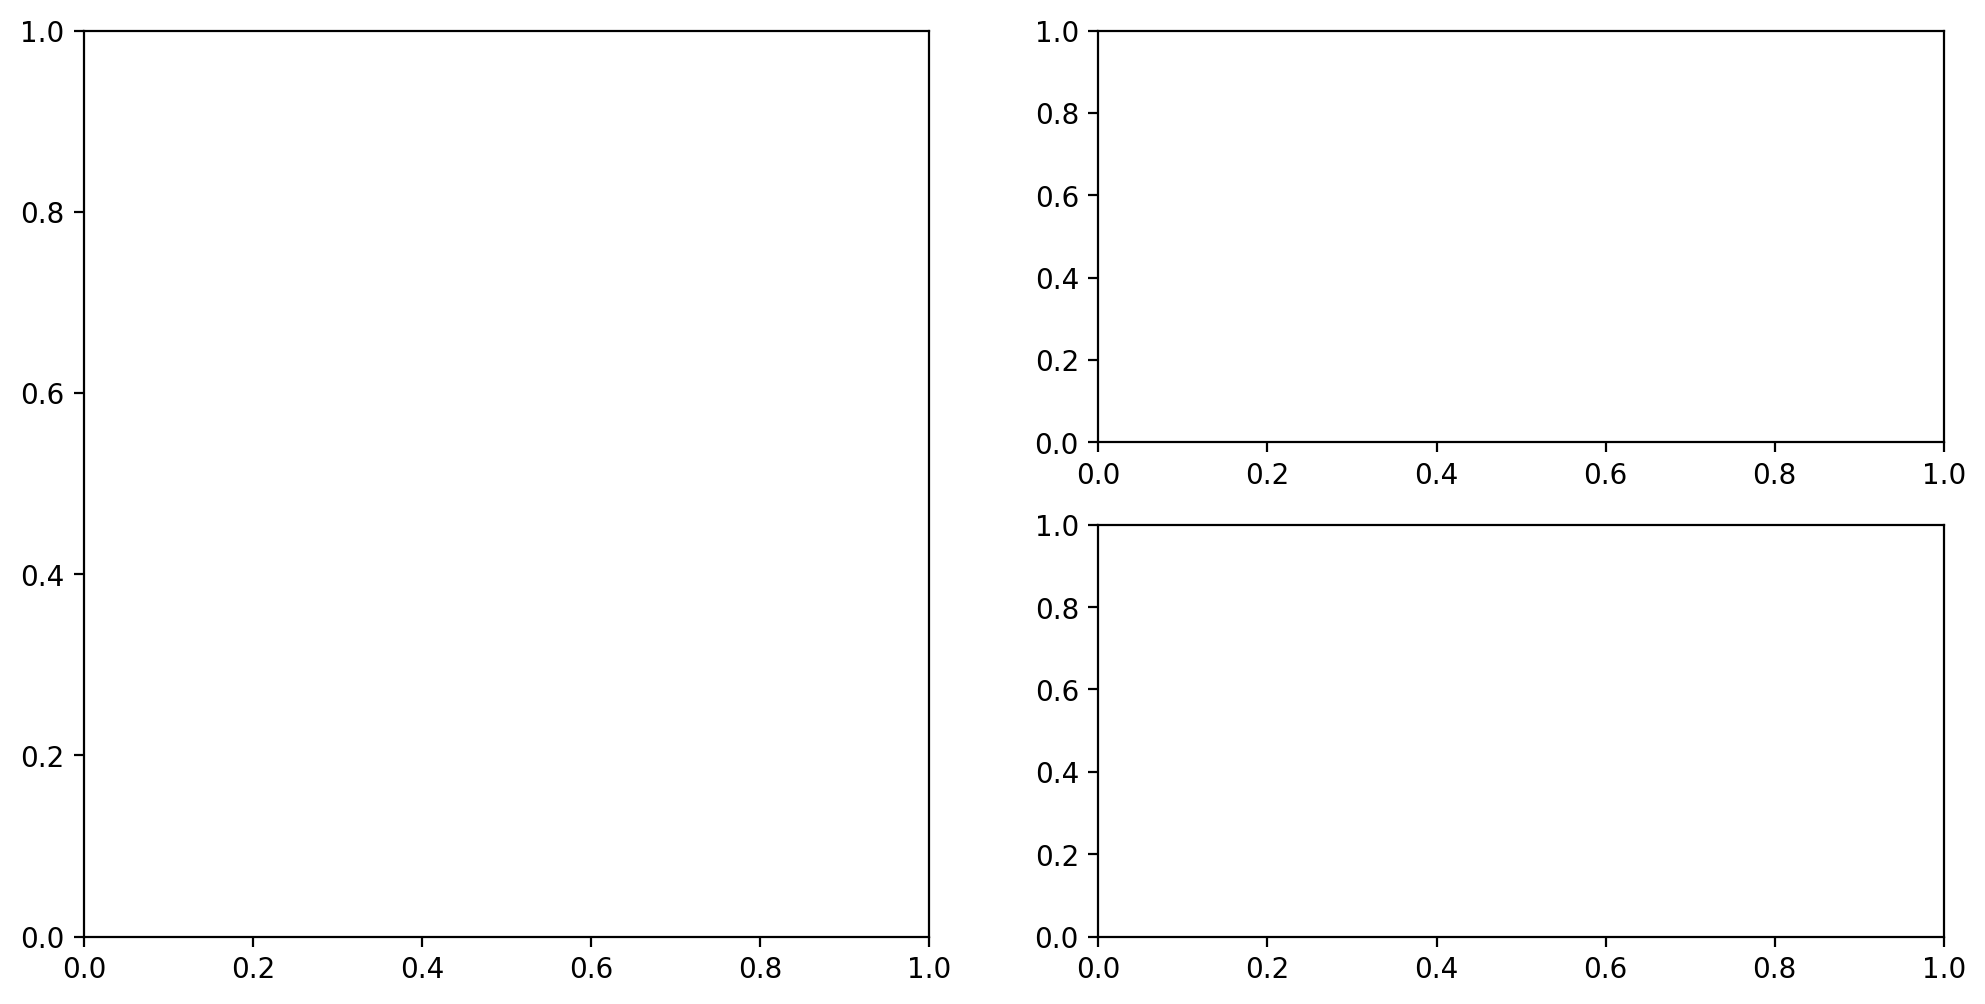

In [5]:
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 4)
fig

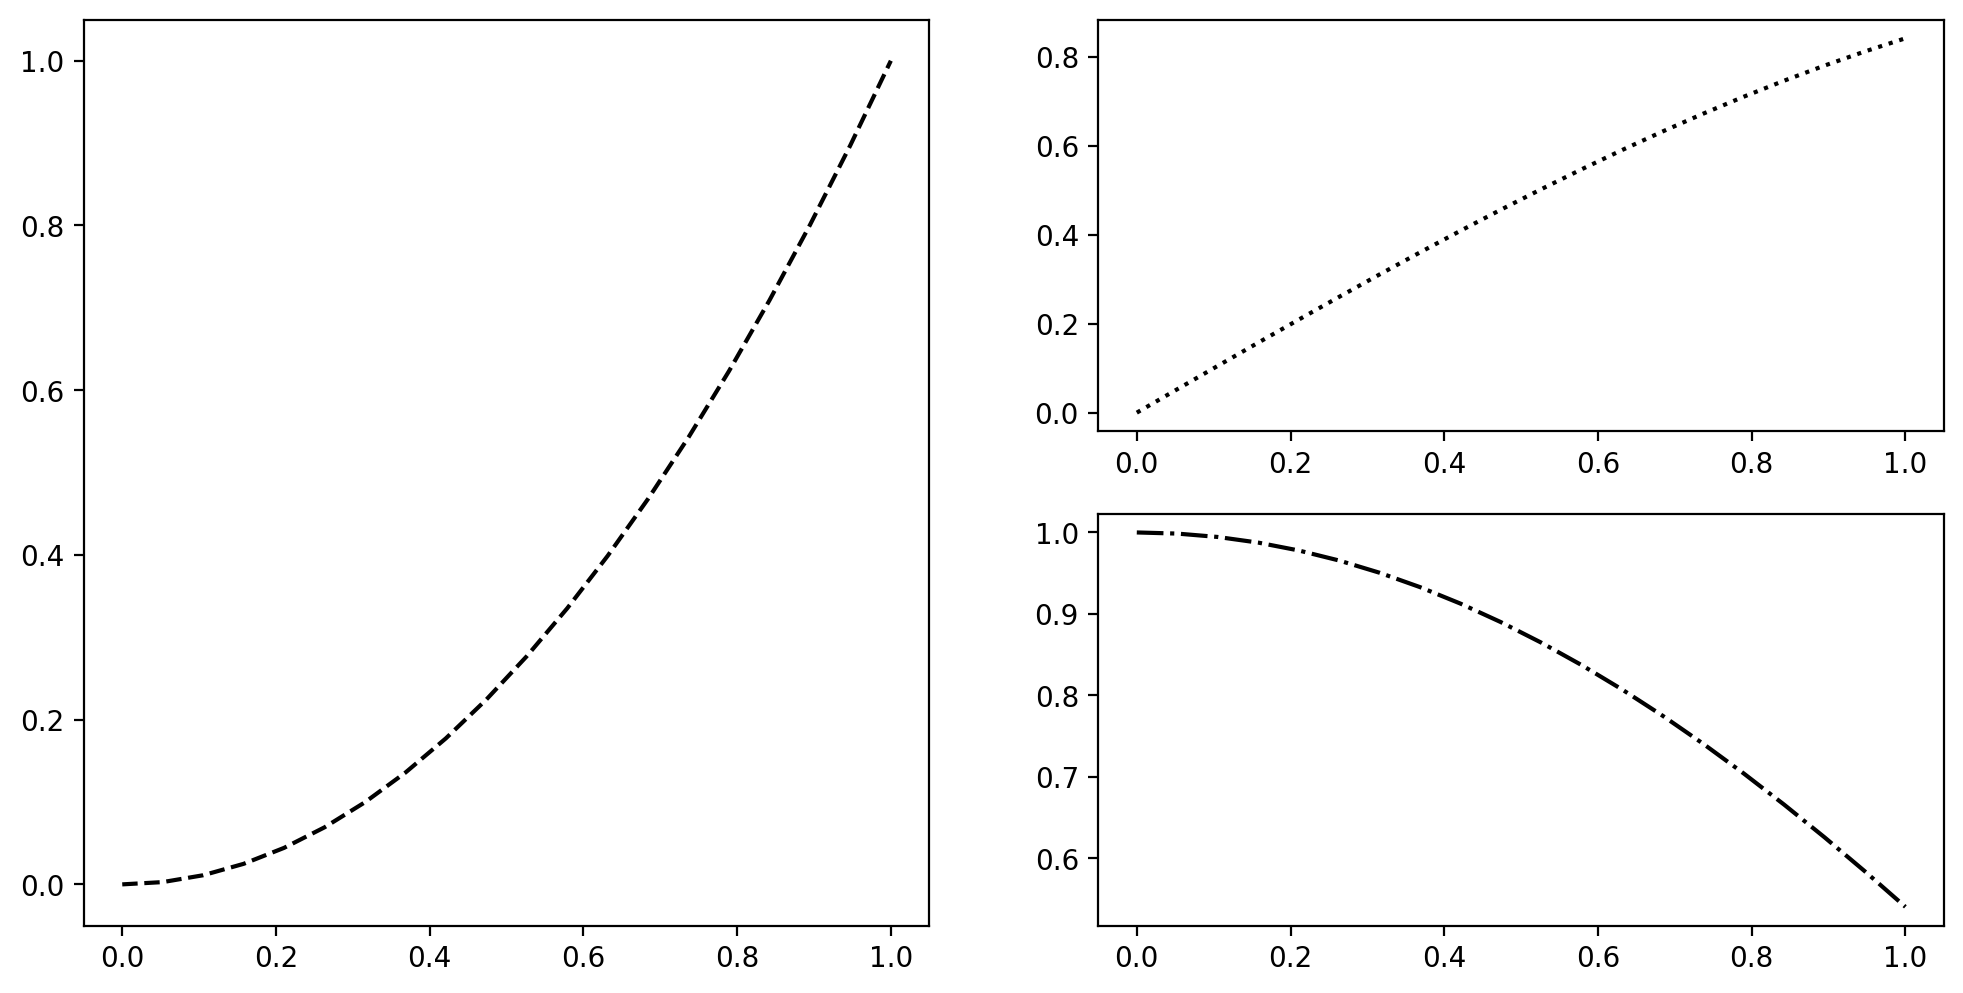

In [6]:
import numpy as np
x = np.linspace(0, 1, num=20)
y1 = np.square(x)
ax1.plot(x, y1, color='black', linestyle='--')

y2 = np.sin(x)
ax2.plot(x, y2, color='black', linestyle=':')

y3 = np.cos(x)
ax3.plot(x, y3, color='black', linestyle='-.')
fig

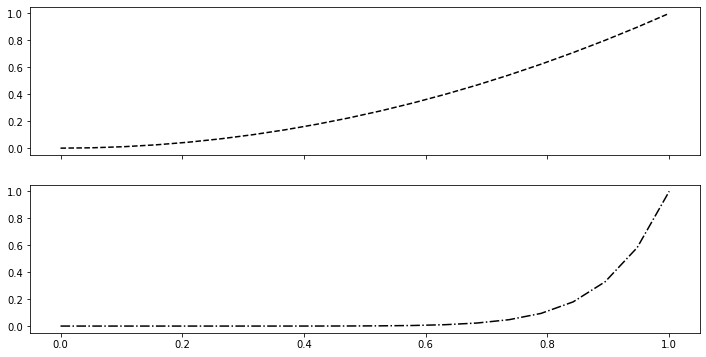

In [7]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)
ax1.plot(x, y1, color='black', linestyle='--')
y2=np.power(x, 10)
ax2.plot(x, y2, color='black', linestyle='-.')

In [8]:
# Colors, Markers and Linestyles

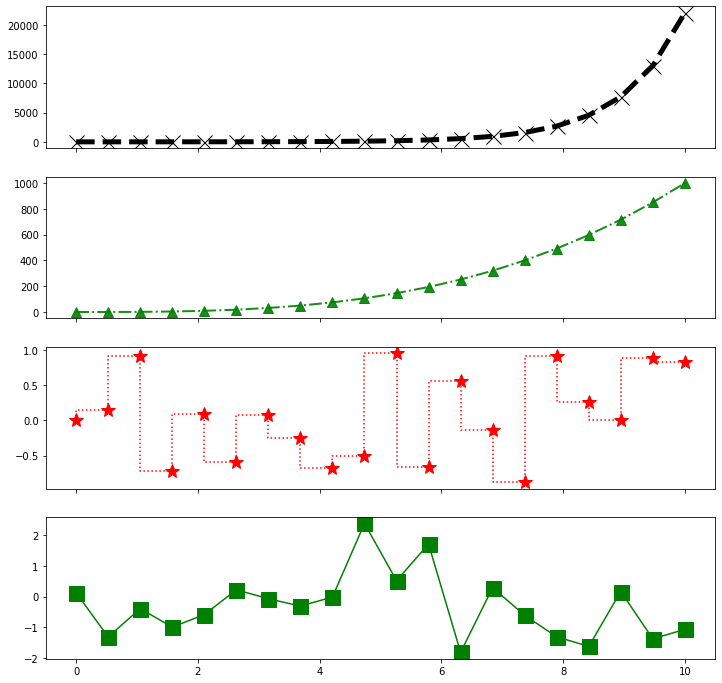

In [9]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(12, 12), sharex=True)
x = np.linspace(0, 10, num=20)
y1 = np.exp(x)
y2 = x ** 3
y3 = np.sin(y2)
y4 = np.random.randn(20)

ax1.plot(x, y1, color='black', linestyle='--', linewidth=5, marker='x', markersize=15)
ax2.plot(x, y2, color='green', linestyle='-.', linewidth=2, marker='^', markersize=10, alpha=0.9)
ax3.plot(x, y3, color='red', linestyle=':', marker='*', markersize=15, drawstyle='steps')
ax4.plot(x, y4, color='green', linestyle='-', marker='s', markersize=15)

In [10]:
# Ticks, Labels and Legends

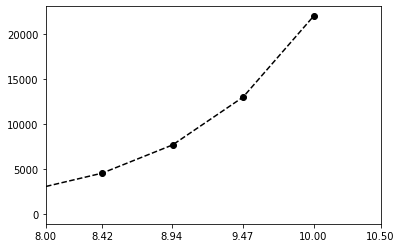

In [11]:
plt.xlim([8, 10.5])
plt.xticks([8, 8.42, 8.94, 9.47, 10, 10.5])
plt.plot(x, y1, color='black', linestyle='--', marker='o')

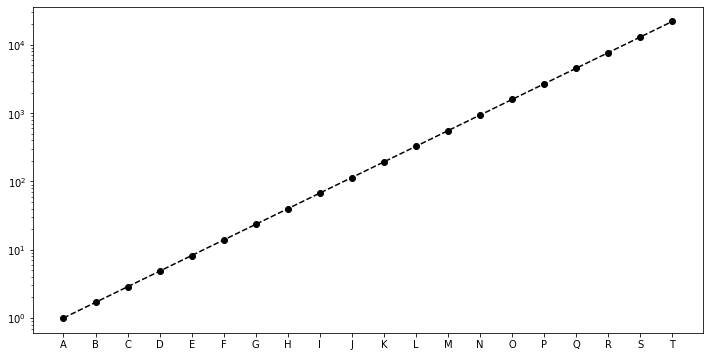

In [12]:
fig, ax = plt.subplots(1, figsize=(12, 6))
ax.set_yscale('log')
ax.set_xticks(x)
ax.set_xticklabels(list('ABCDEFGHIJKLMNOPQRSTUV'))
ax.plot(x, y1, color='black', linestyle='--', marker='o', label='y=exp(x)')

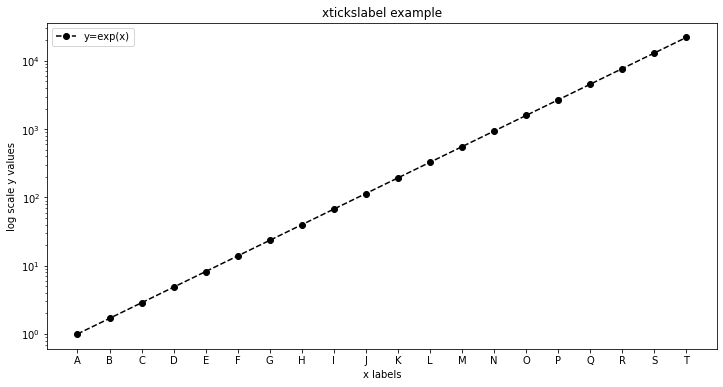

In [13]:
ax.set_title('xtickslabel example')
ax.set_xlabel('x labels')
ax.set_ylabel('log scale y values')
ax.legend(loc='best')
fig

In [14]:
# Annotations

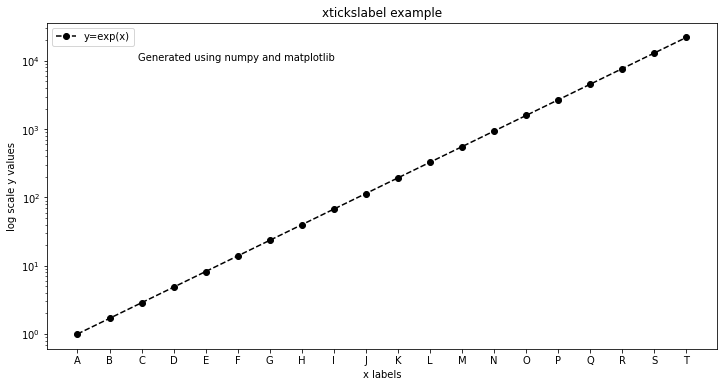

In [15]:
ax.text(1, 10000, 'Generated using numpy and matplotlib')
fig

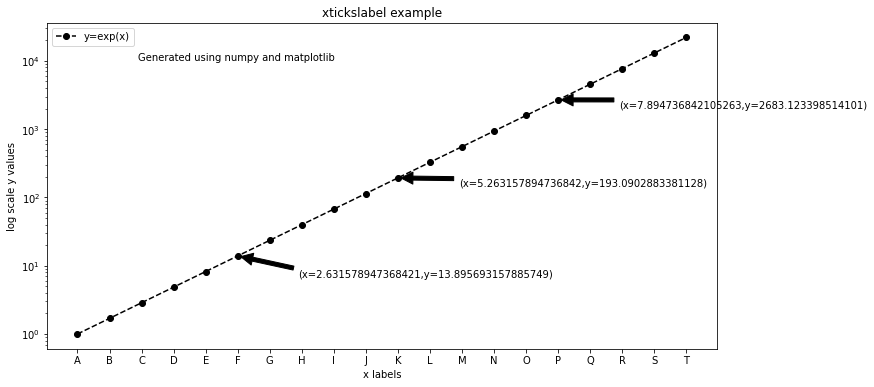

In [16]:
for i in [5, 10, 15]:
 s = '(x=' + str(x[i]) + ',y=' + str(y1[i]) + ')'
 ax.annotate(s, xy=(x[i], y1[i]), xytext=(x[i]+1, y1[i]-5), arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='left', verticalalignment='top')
fig

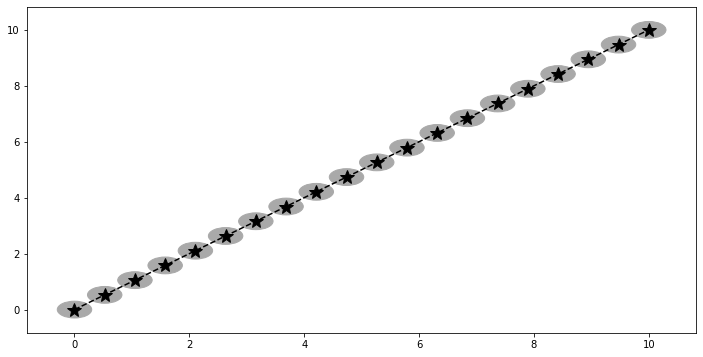

In [17]:
fig, ax = plt.subplots(1, figsize=(12, 6))
ax.plot(x, x, linestyle='--', color='black', marker='*', markersize=15)
for val in x:
    ax.add_patch(plt.Circle(xy=(val, val), radius=0.3, color='darkgray'))

In [18]:
# Saving plots to file

In [19]:
fig.savefig('fig.png', dpi=200)

In [20]:
!display fig.png

In [21]:
# Matplotlib and Pandas

In [22]:
import pandas as pd

In [23]:
df = pd.DataFrame(index=range(1000), columns=['Cont value', 'Delta1 value', 'Delta2 value', 'Cat value'])
df['Cont value'] = np.random.randn(1000).cumsum()
df['Delta1 value'] = np.random.randn(1000)
df['Delta2 value'] = np.random.randn(1000)
df['Cat value'] = np.random.permutation(['Very high', 'High', 'Medium', 'Low', 'Very Low']*200)
df['Delta1 discrete'] = pd.cut(df['Delta1 value'], labels=[-2, -1, 0, 1, 2], bins=5).astype(np.int64)
df['Delta2 discrete'] = pd.cut(df['Delta2 value'], labels=[-2, -1, 0, 1, 2], bins=5).astype(np.int64)
df

,Cont value,Delta1 value,Delta2 value,Cat value,Delta1 discrete,Delta2 discrete
0,-1.429618,0.595897,-0.552871,Very high,1,0
1,-0.710593,1.626343,1.123142,Medium,1,1
2,-0.160866,-0.275150,-0.174951,Low,0,0
3,-0.621138,-0.968744,-1.819814,Very high,-1,-1
4,-1.175934,-1.642901,-0.010948,Very Low,-1,0
...,...,...,...,...,...,...
995,-4.691107,0.759845,-1.657520,Very Low,1,-1
996,-6.775298,-0.065443,0.833529,Very high,0,1
997,-6.152913,-0.649113,1.463203,Medium,0,1
998,-4.928133,-0.426593,-0.141742,Very high,0,0


In [24]:
# Line

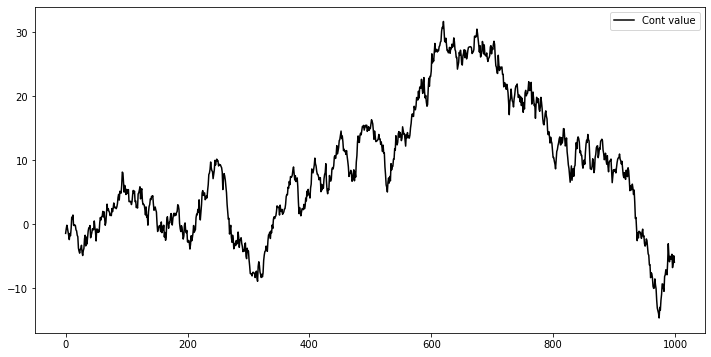

In [25]:
df.plot(y='Cont value', kind='line', color='black', linestyle='-', figsize=(12, 6))

In [26]:
# Bar

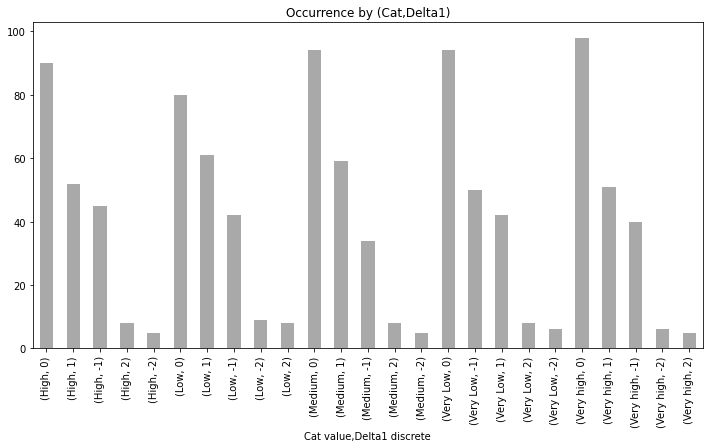

In [27]:
df.groupby('Cat value')['Delta1 discrete'].value_counts().plot(kind='bar', color='darkgray', title='Occurrence by (Cat,Delta1)', figsize=(12, 6))

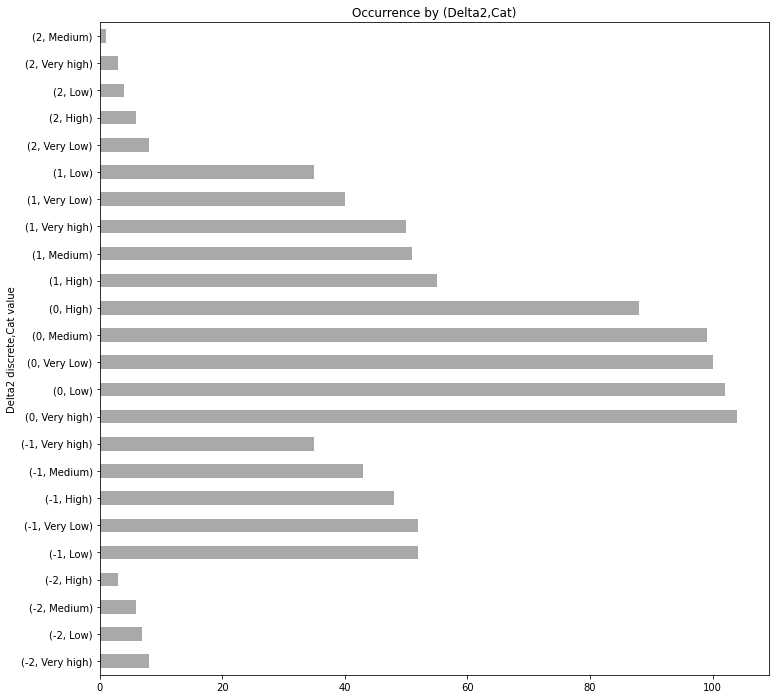

In [28]:
df.groupby('Delta2 discrete')['Cat value'].value_counts().plot(kind='barh', color='darkgray', title='Occurrence by (Delta2,Cat)', figsize=(12, 12))

In [29]:
# Histogram

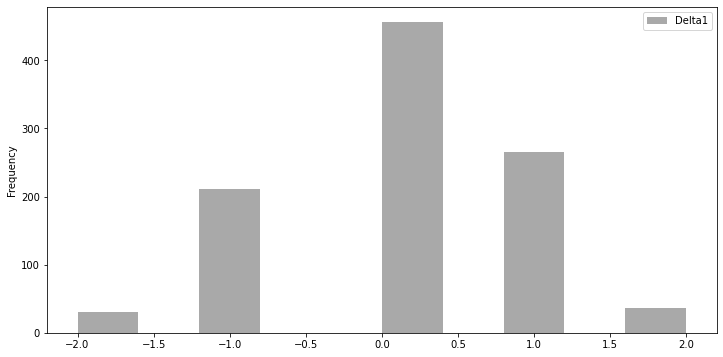

In [30]:
df['Delta1 discrete'].plot(kind='hist', color='darkgray', figsize=(12, 6), label='Delta1')
plt.legend()

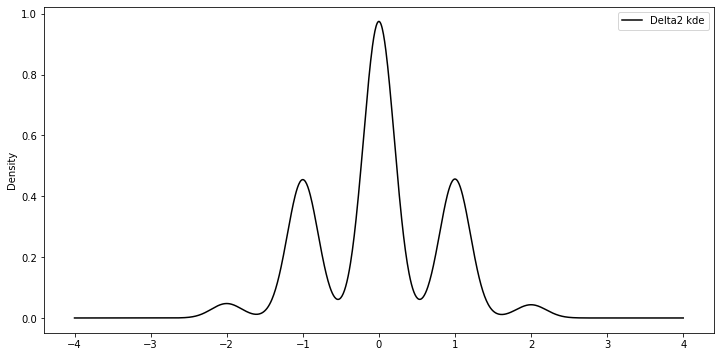

In [31]:
df['Delta2 discrete'].plot(kind='kde', color='black', figsize=(12, 6), label='Delta2 kde')
plt.legend()

In [34]:
# Scatter plot

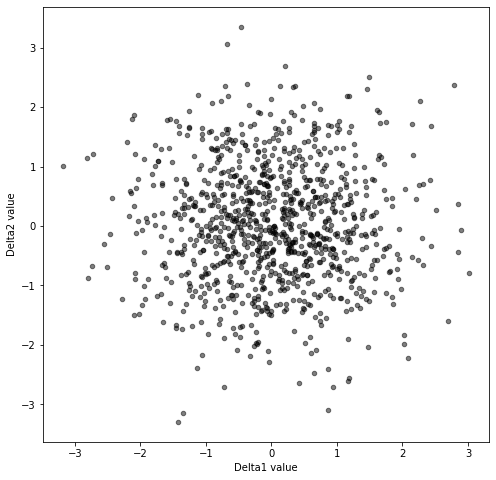

In [32]:
df.plot(kind='scatter', x='Delta1 value', y='Delta2 value', alpha=0.5, color='black', figsize=(8, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e4a511860>,
      dtype=object)

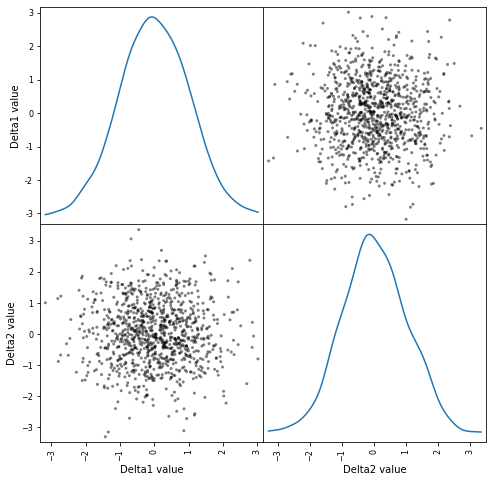

In [33]:
pd.plotting.scatter_matrix(df[['Delta1 value', 'Delta2 value']], diagonal='kde', color='black', figsize=(8, 8))

In [35]:
# Plotting time series

In [59]:
dates = pd.date_range('1992-01-01', '2012-10-22')
time_series = pd.DataFrame(index=dates, columns=['A', 'B'])
time_series['A'] = np.random.randint(low=-100, high=101, size=len(dates)).cumsum() + 5000
time_series['B'] = np.random.randint(low=-75, high=76, size=len(dates)).cumsum() + 5000
time_series

,A,B
1992-01-01,5079,5042
1992-01-02,5088,5047
1992-01-03,4997,5116
1992-01-04,5023,5128
1992-01-05,5057,5144
...,...,...
2012-10-18,6651,7126
2012-10-19,6588,7181
2012-10-20,6683,7175
2012-10-21,6585,7209


In [61]:
# Price plots

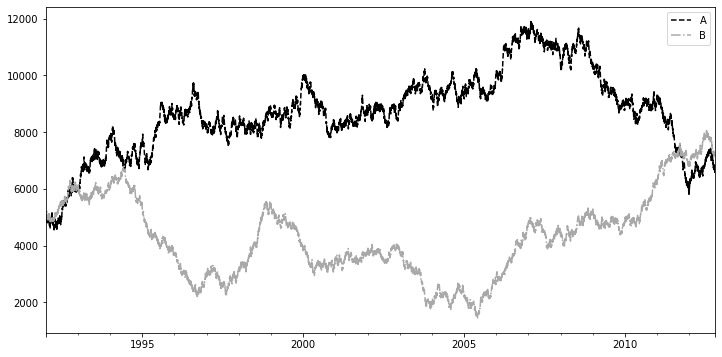

In [62]:
time_series['A'].plot(kind='line', linestyle='--', color='black', figsize=(12, 6), label='A')
time_series['B'].plot(kind='line', linestyle='-.', color='darkgray', figsize=(12, 6), label='B')
plt.legend()

In [63]:
# Price change histogram

In [66]:
time_series['A_1_delta'] = time_series['A'].shift(-1) - time_series['A'].fillna(0)
time_series['B_1_delta'] = time_series['B'].shift(-1) - time_series['B'].fillna(0)

time_series['A_5_delta'] = time_series['A'].shift(-5) - time_series['A'].fillna(0)
time_series['B_5_delta'] = time_series['B'].shift(-5) - time_series['B'].fillna(0)

time_series['A_20_delta'] = time_series['A'].shift(-20) - time_series['A'].fillna(0)
time_series['B_20_delta'] = time_series['B'].shift(-20) - time_series['B'].fillna(0)
time_series_deltas = time_series[['A_1_delta', 'B_1_delta', 'A_5_delta', 'B_5_delta', 'A_20_delta', 'B_20_delta']].dropna()
time_series_deltas

,A_1_delta,B_1_delta,A_5_delta,B_5_delta,A_20_delta,B_20_delta
1992-01-01,9.0,5.0,-49.0,118.0,-249.0,-56.0
1992-01-02,-91.0,69.0,-84.0,123.0,-296.0,-92.0
1992-01-03,26.0,12.0,-77.0,55.0,-223.0,-130.0
1992-01-04,34.0,16.0,-86.0,-22.0,-224.0,-92.0
1992-01-05,-27.0,16.0,-139.0,19.0,-242.0,-91.0
...,...,...,...,...,...,...
2012-09-28,-52.0,-21.0,-131.0,35.0,-291.0,-129.0
2012-09-29,-79.0,-9.0,-124.0,44.0,-302.0,-53.0
2012-09-30,-78.0,68.0,-130.0,-2.0,-128.0,-50.0
2012-10-01,88.0,41.0,-40.0,-126.0,-148.0,-84.0


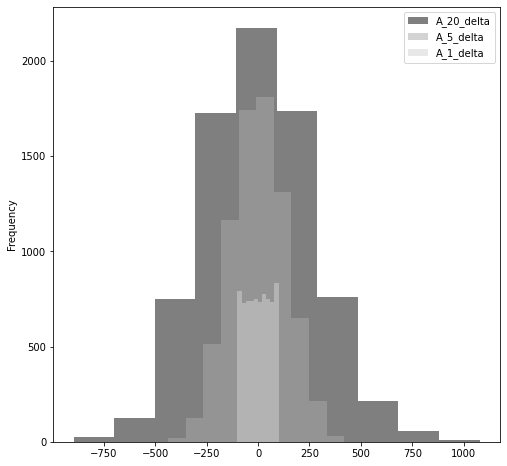

In [73]:
time_series_deltas['A_20_delta'].plot(kind='hist', color='black', alpha=0.5, label='A_20_delta', figsize=(8,8))
time_series_deltas['A_5_delta'].plot(kind='hist', color='darkgray', alpha=0.5, label='A_5_delta', figsize=(8,8))
time_series_deltas['A_1_delta'].plot(kind='hist', color='lightgray', alpha=0.5, label='A_1_delta', figsize=(8,8))
plt.legend()

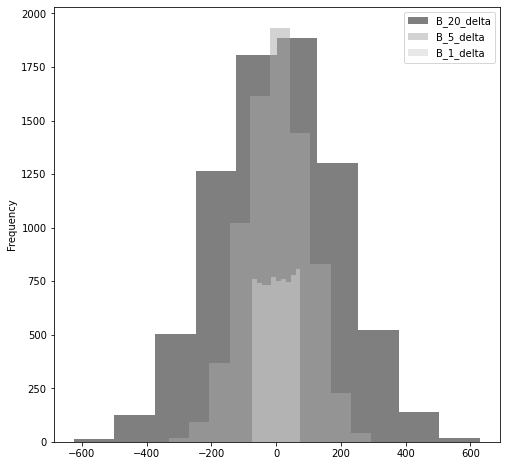

In [74]:
time_series_deltas['B_20_delta'].plot(kind='hist', color='black', alpha=0.5, label='B_20_delta', figsize=(8,8))
time_series_deltas['B_5_delta'].plot(kind='hist', color='darkgray', alpha=0.5, label='B_5_delta', figsize=(8,8))
time_series_deltas['B_1_delta'].plot(kind='hist', color='lightgray', alpha=0.5, label='B_1_delta', figsize=(8,8))
plt.legend()

In [75]:
# Price change density

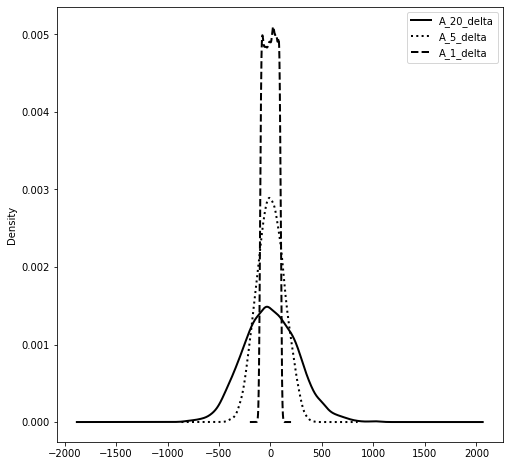

In [86]:
time_series_deltas['A_20_delta'].plot(kind='kde', linestyle='-', linewidth=2, color='black', label='A_20_delta', figsize=(8,8))
time_series_deltas['A_5_delta'].plot(kind='kde', linestyle=':', linewidth=2, color='black', label='A_5_delta', figsize=(8,8))
time_series_deltas['A_1_delta'].plot(kind='kde', linestyle='--', linewidth=2, color='black', label='A_1_delta', figsize=(8,8))
plt.legend()

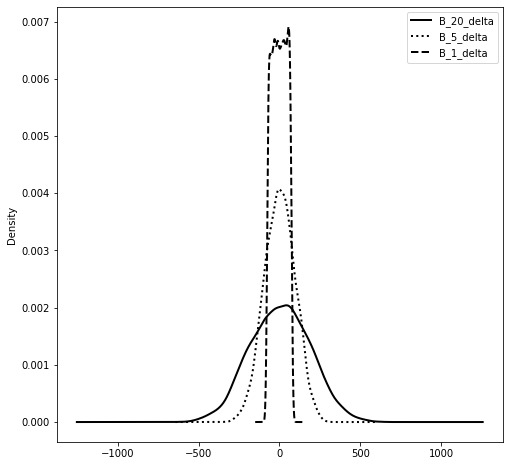

In [87]:
time_series_deltas['B_20_delta'].plot(kind='kde', linestyle='-', linewidth=2, color='black', label='B_20_delta', figsize=(8,8))
time_series_deltas['B_5_delta'].plot(kind='kde', linestyle=':', linewidth=2, color='black', label='B_5_delta', figsize=(8,8))
time_series_deltas['B_1_delta'].plot(kind='kde', linestyle='--', linewidth=2, color='black', label='B_1_delta', figsize=(8,8))
plt.legend()

In [88]:
# Box plots by interval

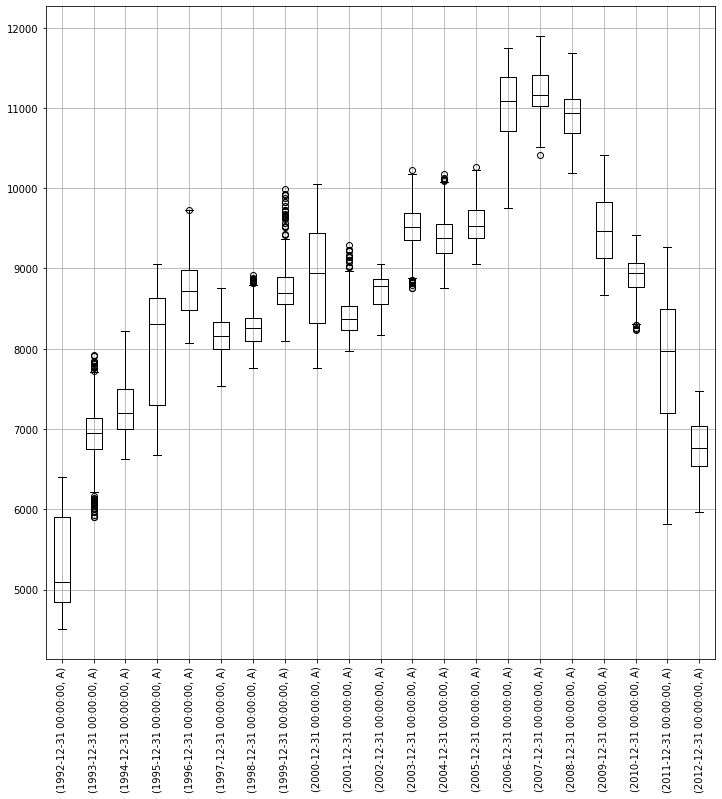

In [132]:
group_A = time_series[['A']].groupby(pd.Grouper(freq='A'))
group_A.boxplot(color='black', subplots=False, rot=90, figsize=(12,12))

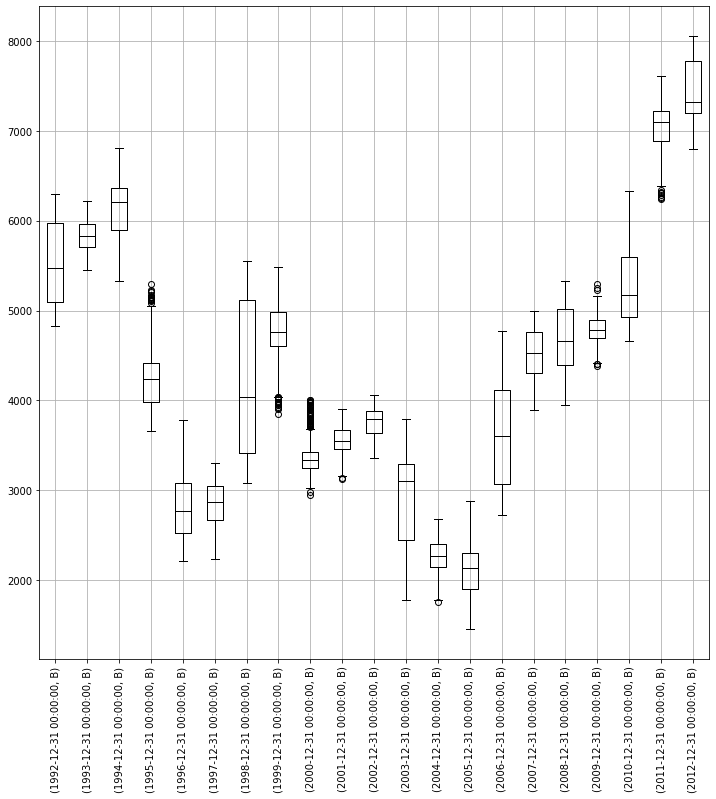

In [133]:
group_B = time_series[['B']].groupby(pd.Grouper(freq='A'))
group_B.boxplot(color='black', subplots=False, rot=90, figsize=(12,12))

In [134]:
# Time series lag scatter plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e3d3e3748>,
      dtype=object)

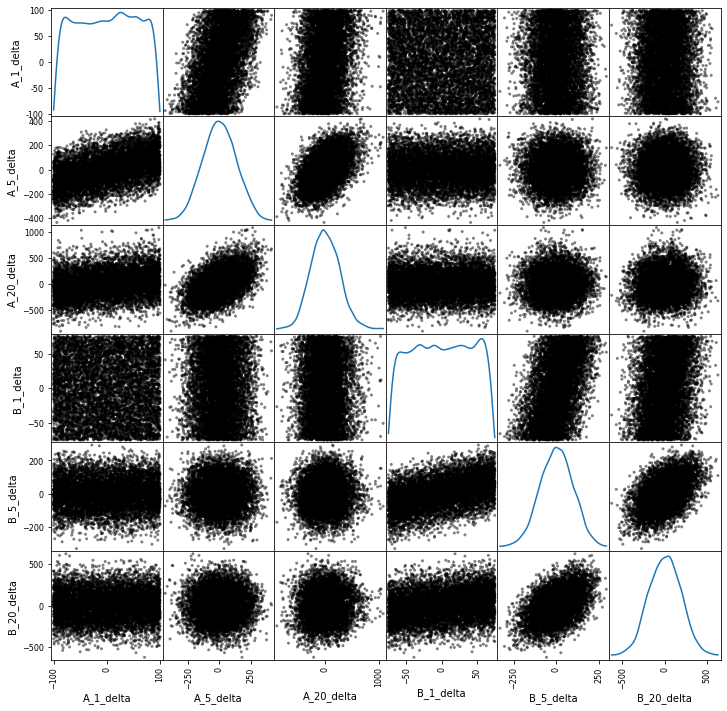

In [139]:
pd.plotting.scatter_matrix(time_series[['A_1_delta', 'A_5_delta', 'A_20_delta', 'B_1_delta', 'B_5_delta', 'B_20_delta']], diagonal='kde', color='black', figsize=(12, 12))

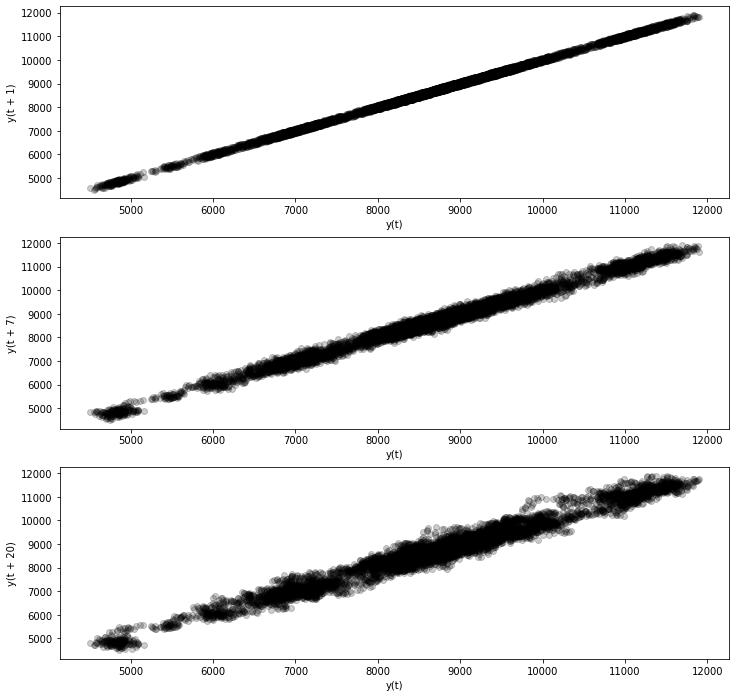

In [152]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12, 12))
pd.plotting.lag_plot(time_series['A'], ax=ax1, lag=1, c='black', alpha=0.2)
pd.plotting.lag_plot(time_series['A'], ax=ax2, lag=7, c='black', alpha=0.2)
pd.plotting.lag_plot(time_series['A'], ax=ax3, lag=20, c='black', alpha=0.2)

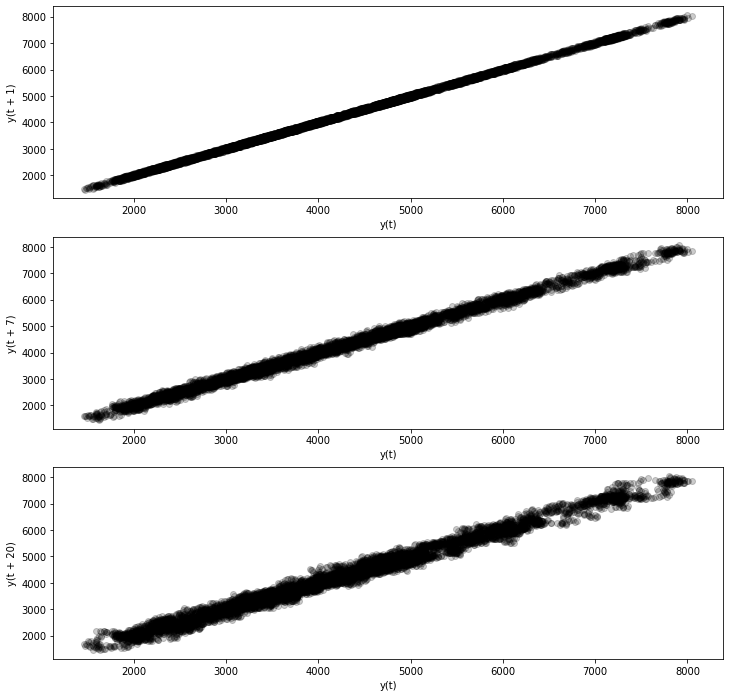

In [165]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12, 12))
pd.plotting.lag_plot(time_series['B'], ax=ax1, lag=1, c='black', alpha=0.2)
pd.plotting.lag_plot(time_series['B'], ax=ax2, lag=7, c='black', alpha=0.2)
pd.plotting.lag_plot(time_series['B'], ax=ax3, lag=20, c='black', alpha=0.2)

In [153]:
# Time series Autocorrelation plots

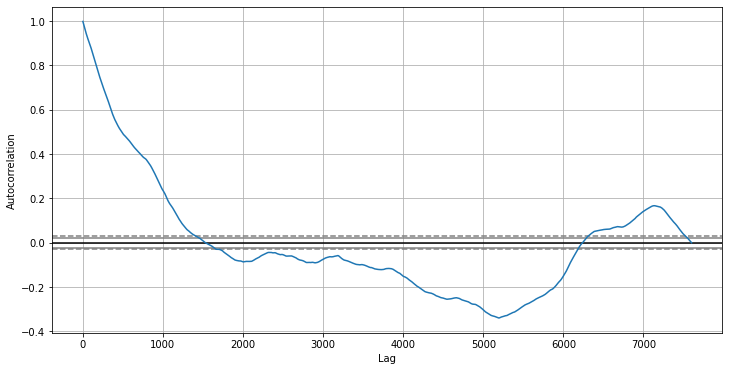

In [163]:
fig, ax = plt.subplots(1, figsize=(12, 6))
pd.plotting.autocorrelation_plot(time_series['A'], ax=ax)

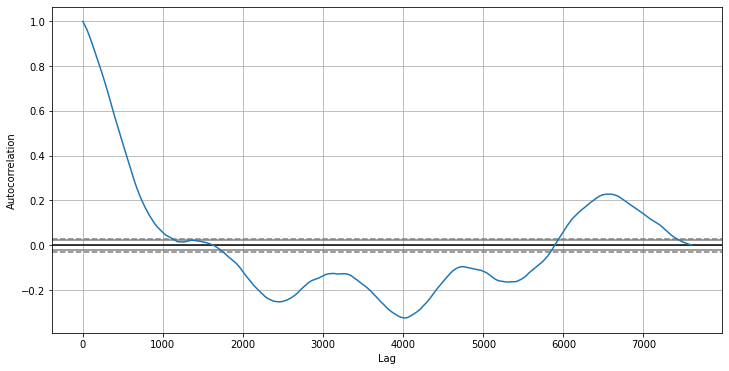

In [164]:
fig, ax = plt.subplots(1, figsize=(12, 6))
pd.plotting.autocorrelation_plot(time_series['B'], ax=ax)